%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Plotting the Gender - Male


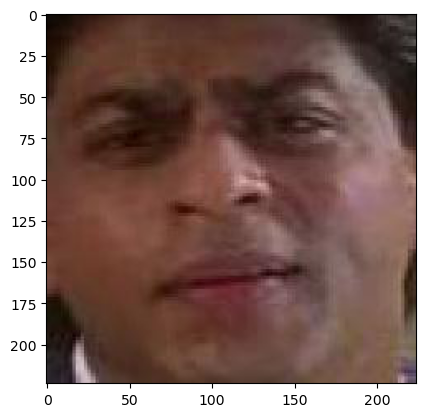

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print('Plotting the Gender - Male')
img=mpimg.imread('./data/train/images/10123.jpg')
imgplot = plt.imshow(img)
plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Plotting the Gender - Female


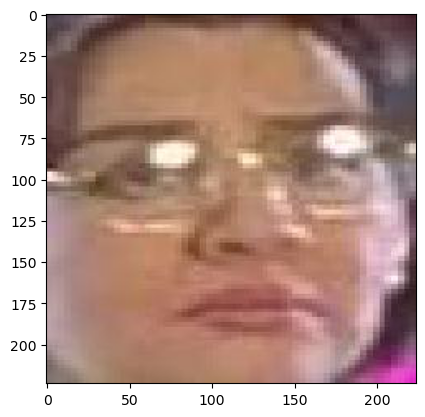

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print('Plotting the Gender - Female')
img=mpimg.imread('./data/train/images/176.jpg')
imgplot = plt.imshow(img)
plt.show()


# Import Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

## Load and preprocess the data

#### <b> Initialize the parameters

In [5]:
img_width, img_height = 224,224  #width and height of the images
train_df = pd.read_csv('./data/train/train.csv')  # Load the CSV file
train_dir = './data/train/images'  # Path to the train images folder
test_data_dir = './data/train/images' 

test_df = pd.read_csv('./data/test.csv.xls')  # Load the test CSV file
test_dir = './data/train/images'  # Path to the test images folder


nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [6]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)
print('Input image shape [rows][cols][channels] : {0}'.format(input_shape))

Input image shape [rows][cols][channels] : (224, 224, 3)


In [7]:
# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                             shear_range=0.2,  # Shear transformations
                             zoom_range=0.2,  # Randomly zoom
                             horizontal_flip=True)  # Randomly flip horizontally

train_df['class'] = train_df['class'].astype(str)  # Convert class labels to strings

# Generate training data from images and labels
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='image_names',  # Column name containing image filenames
    y_col='class',  # Column name containing labels
    target_size=(img_width, img_height),  # Resize images to a consistent size
    batch_size=32,
    class_mode='binary'  # Binary classification (0 or 1)
)

test_datagen=ImageDataGenerator (rescale=1. /255)

# Generate test data from images and labels
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='image_names',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode=None,  # Set class_mode to None since there are no class labels
    shuffle=False  # Do not shuffle the test data
)

Found 12196 validated image filenames belonging to 2 classes.
Found 5227 validated image filenames.


####**Visual Representation of ImageDataGenerator**

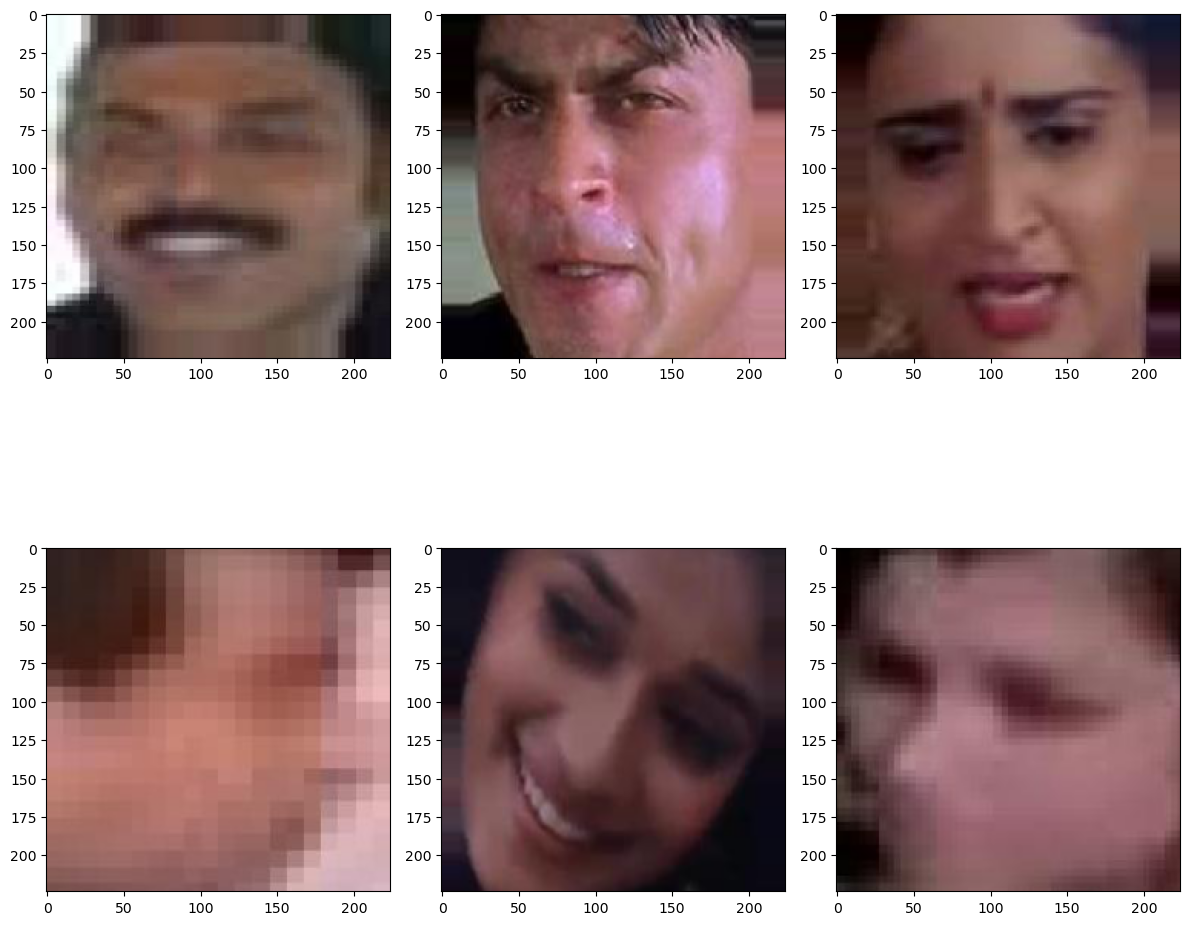

In [8]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Build the Model

### CNN Layers

1. Conlutional Layer
2. Activation Fn: ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)

In [9]:
model = Sequential()

# Add convolutional layers : This class allows to create convolutional neural network to extract feature from the images
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))#32 neurons with 3*3 filter
#MaxPooling2D helps to reduce the size of the data
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps : Converts multi dimensional array to 1D channel
model.add(Flatten())

# Add fully connected layers : #256 neurons with 3*3 filter 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training 
# Add fully connected layers : #128 neurons with 3*3 filter 
model.add(Dense(128, activation='relu'))
# The activation function used is sigmoid, which squashes the output between 0 and 1, representing the probability of the input image belonging to the positive class (female).
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

# Train the model

In [10]:
#from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#earlystop = EarlyStopping(monitor='val_accuracy', patience = 5, min_delta = 0.01, mode='max')
training = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=test_generator,
                       validation_steps=nb_validation_samples)

#training = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,callbacks=[earlystop])

/var/folders/46/qw2n4h9s2h5bshtky4q6y1sc0000gn/T/ipykernel_1337/315654050.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,
2023-05-27 14:42:03.237371: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.4871

2023-05-27 14:42:52.465182: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 52s 512ms/step - loss: 0.6943 - accuracy: 0.4871 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
100/100 [==============================] - 54s 534ms/step - loss: 0.6822 - accuracy: 0.5594 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
100/100 [==============================] - 49s 493ms/step - loss: 0.5816 - accuracy: 0.7047 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
100/100 [==============================] - 54s 535ms/step - loss: 0.5126 - accuracy: 0.7625 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
100/100 [==============================] - 50s 501ms/step - loss: 0.4761 - accuracy: 0.7803 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
100/100 [==============================] - 50s 495ms/step - loss: 0.4645 - accuracy: 0.7916 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
100/100 [==============================] - 50s 497ms/step - loss: 0.4377 - accurac

#### <b> Find the accuracy score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


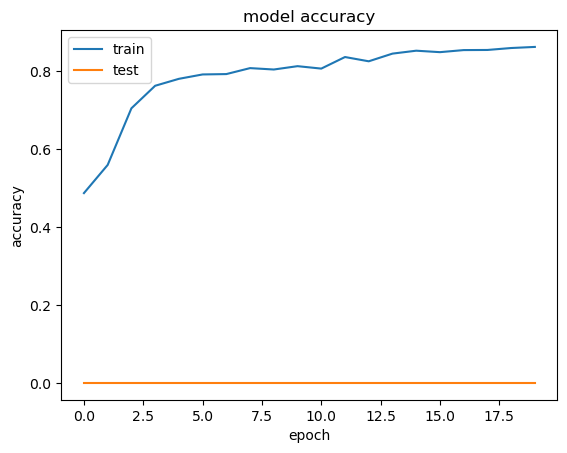

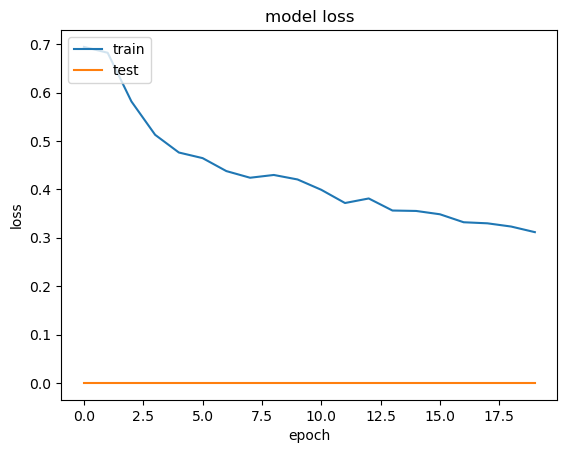

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [12]:
model.save('./data/gender_classification_model.h5')

/Users/spy/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load Saved model

In [13]:
model = tf.keras.models.load_model('./data/gender_classification_model.h5')

# Evaluate Model using test data

In [14]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

  7/164 [>.............................] - ETA: 2s - loss: 0.0000e+00 - accuracy: 0.0000e+00

2023-05-27 16:08:28.591579: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


164/164 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 0.0000
